In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Circadian Microbiome

In [2]:
metadata = pd.read_table('../data/CircadianIHC/Microbiome/circadianIHC_metadata_cleaned.txt', sep='\t', index_col=0)
metadata.head()

,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,timepoint,zt,cycle,collection_timestamp,description,...,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment
sample_name,,,,,,,,,,,,,,,,,,,,,
11548.132.133.1a,A32.133.1,not applicable,not applicable,not applicable,A32,1,2,day,12/14/17 8:00,4-8 am collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.2a,A32.133.2,not applicable,not applicable,not applicable,A32,2,6,day,12/14/17 12:00,8 am-12 pm collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.3a,A32.133.3,not applicable,not applicable,not applicable,A32,3,10,day,12/14/17 16:00,12 pm-4 pm collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.4a,A32.133.4,not applicable,not applicable,not applicable,A32,4,14,night,12/14/17 20:00,4 pm-8 pm collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.5a,A32.133.5,not applicable,not applicable,not applicable,A32,5,18,night,12/15/17 0:00,8 pm-12 am collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf


In [13]:
cIHC_wUF_dm = pd.read_csv('../data/CircadianIHC/Microbiome/CircadianIHC-wUF-distance-matrix.tsv', sep='\t', index_col=0)
dm_samples = set(cIHC_wUF_dm.columns)

In [9]:
micro_rawreads_phyla = pd.read_table('../../Circadian_IHC/data/Microbiome/CircadianIHC_phylacounts.txt', sep='\t', index_col=0)
micro_rawreads_phyla

,11548.A25.126.5a,11548.132.133.5a,11548.A27.128.1a,11548.A31.132.3a,11548.A29.130.5a,11548.A26.127.1a,11548.A30.131.1a,11548.A26.127.4a,11548.A24.125.2a,11548.A30.131.4a,...,11548.A29.130.2a,11548.132.133.2a,11548.A25.126.2a,11548.A31.132.4a,11548.A27.128.6a,11548.A31.132.1a,11548.A27.128.3a,11548.A24.125.5a,11548.A30.131.3a,11548.A26.127.3a
#OTU ID,,,,,,,,,,,,,,,,,,,,,
k__Archaea;p__Crenarchaeota,0,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;__,404,310,0,206,351,164,221,854,349,324,...,473,292,556,487,387,266,426,217,315,548
k__Bacteria;p__Actinobacteria,7,64,2,25,134,22,11,66,7,179,...,257,58,14,71,32,34,24,8,72,39
k__Bacteria;p__Bacteroidetes,4818,3344,26,6467,6551,3137,6442,2857,12007,2426,...,3878,3264,9372,4831,6541,6401,7055,6404,4483,3102
k__Bacteria;p__Chloroflexi,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
k__Bacteria;p__Cyanobacteria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Firmicutes,5403,6211,39,4624,6259,6473,6032,9926,7022,8944,...,7282,9034,8649,9077,8914,9612,8528,5801,10298,11999
k__Bacteria;p__Proteobacteria,0,15,4,0,0,0,0,0,5,2,...,0,7,2,0,0,31,0,0,2,0
k__Bacteria;p__Tenericutes,10,17,0,2,65,0,3,0,21,5,...,33,0,28,0,3,6,0,21,3,0


In [14]:
all_samples = set(micro_rawreads_phyla.columns)
keep_samples = dm_samples.intersection(all_samples)

In [16]:
lost_samples = all_samples - dm_samples
lost_samples

{'11548.132.133.4a', '11548.A27.128.1a'}

In [15]:
micro_rawreads_phyla2 = micro_rawreads_phyla[list(keep_samples)].copy()
micro_rawreads_phyla2

,11548.A31.132.4a,11548.A27.128.2a,11548.A29.130.5a,11548.A29.130.6a,11548.A29.130.4a,11548.132.133.6a,11548.A27.128.4a,11548.A31.132.5a,11548.A30.131.1a,11548.A25.126.4a,...,11548.A26.127.4a,11548.A25.126.6a,11548.A31.132.1a,11548.A30.131.3a,11548.A29.130.1a,11548.A26.127.6a,11548.A27.128.6a,11548.132.133.3a,11548.A30.131.4a,11548.A26.127.2a
#OTU ID,,,,,,,,,,,,,,,,,,,,,
k__Archaea;p__Crenarchaeota,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;__,487,237,351,286,601,207,733,301,221,707,...,854,359,266,315,438,459,387,316,324,312
k__Bacteria;p__Actinobacteria,71,15,134,121,302,46,21,22,11,10,...,66,4,34,72,226,21,32,81,179,52
k__Bacteria;p__Bacteroidetes,4831,8145,6551,5165,5527,3470,6314,4694,6442,8623,...,2857,5274,6401,4483,7377,4110,6541,2068,2426,7802
k__Bacteria;p__Chloroflexi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Cyanobacteria,0,0,0,0,0,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Firmicutes,9077,7090,6259,5058,11750,6057,9481,5570,6032,9614,...,9926,5795,9612,10298,9536,11930,8914,12524,8944,9385
k__Bacteria;p__Proteobacteria,0,0,0,0,2,21,0,2,0,0,...,0,0,31,2,2,2,0,0,2,6
k__Bacteria;p__Tenericutes,0,3,65,27,29,0,0,2,3,50,...,0,8,6,3,60,3,3,6,5,2


In [17]:
micro_rawreads_phyla_all = pd.merge(metadata, micro_rawreads_phyla2.T, left_index=True, right_index=True)
micro_rawreads_phyla_all.head()

,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,timepoint,zt,cycle,collection_timestamp,description,...,k__Bacteria;__,k__Bacteria;p__Actinobacteria,k__Bacteria;p__Bacteroidetes,k__Bacteria;p__Chloroflexi,k__Bacteria;p__Cyanobacteria,k__Bacteria;p__Firmicutes,k__Bacteria;p__Proteobacteria,k__Bacteria;p__Tenericutes,k__Bacteria;p__Verrucomicrobia,k__Bacteria;p__[Thermi]
11548.132.133.1a,A32.133.1,not applicable,not applicable,not applicable,A32,1,2,day,12/14/17 8:00,4-8 am collection mouse 133,...,306,38,6006,0,0,9564,0,2,7922,0
11548.132.133.2a,A32.133.2,not applicable,not applicable,not applicable,A32,2,6,day,12/14/17 12:00,8 am-12 pm collection mouse 133,...,292,58,3264,0,0,9034,7,0,5742,0
11548.132.133.3a,A32.133.3,not applicable,not applicable,not applicable,A32,3,10,day,12/14/17 16:00,12 pm-4 pm collection mouse 133,...,316,81,2068,0,0,12524,0,6,4697,0
11548.132.133.5a,A32.133.5,not applicable,not applicable,not applicable,A32,5,18,night,12/15/17 0:00,8 pm-12 am collection mouse 133,...,310,64,3344,0,0,6211,15,17,15492,0
11548.132.133.6a,A32.133.6,not applicable,not applicable,not applicable,A32,6,22,night,12/15/17 4:00,12 am-4 am collection mouse 133,...,207,46,3470,0,23,6057,21,0,12832,6


In [18]:
micro_rawreads_phyla_all["Log_Bacteroidetes_Verrucomicrobia"] = np.log(micro_rawreads_phyla_all['k__Bacteria;p__Bacteroidetes']) - np.log(micro_rawreads_phyla_all['k__Bacteria;p__Verrucomicrobia'])

In [20]:
micro_rawreads_phyla_all["Both"] = micro_rawreads_phyla_all['exposure_type'].astype(str) + "_" + micro_rawreads_phyla_all['zt'].astype(str)

In [21]:
high_values = ["Air_18", "IHC_6"]
low_values = ["Air_22", "IHC_18"]

In [22]:
micro_rawreads_phyla_high  = micro_rawreads_phyla_all.loc[micro_rawreads_phyla_all['Both'].isin(high_values)]
micro_rawreads_phyla_low = micro_rawreads_phyla_all.loc[micro_rawreads_phyla_all['Both'].isin(low_values)]

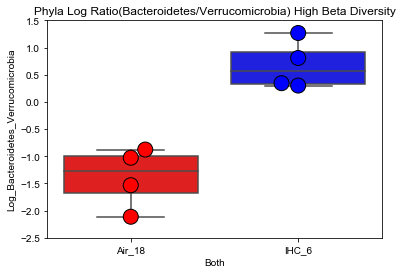

In [51]:
ax = sns.boxplot(x="Both", y="Log_Bacteroidetes_Verrucomicrobia", 
            palette=['red', 'blue'], data=micro_rawreads_phyla_high)
ax = sns.swarmplot(x="Both", y="Log_Bacteroidetes_Verrucomicrobia", s=15, edgecolor='k', linewidth=1,
            palette=['red', 'blue'], data=micro_rawreads_phyla_high)
plt.title("Phyla Log Ratio(Bacteroidetes/Verrucomicrobia) High Beta Diversity")
ax.set(ylim=(-2.5, 1.5))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_logratio_highbeta_phyla.svg', dpi=300, bbox_inches="tight")

In [47]:
from scipy.stats import mannwhitneyu

In [38]:
x = list(micro_rawreads_phyla_high[micro_rawreads_phyla_high["Both"] == "Air_18"].Log_Bacteroidetes_Verrucomicrobia.values)
y = list(micro_rawreads_phyla_high[micro_rawreads_phyla_high["Both"] == "IHC_6"].Log_Bacteroidetes_Verrucomicrobia.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=0.0, pvalue=0.015191410988288745)

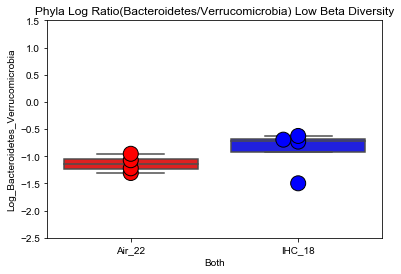

In [52]:
ax = sns.boxplot(x="Both", y="Log_Bacteroidetes_Verrucomicrobia", 
            palette=['red', 'blue'], data=micro_rawreads_phyla_low)
ax = sns.swarmplot(x="Both", y="Log_Bacteroidetes_Verrucomicrobia", s=15, edgecolor='k', linewidth=1,
            palette=['red', 'blue'], data=micro_rawreads_phyla_low)
plt.title("Phyla Log Ratio(Bacteroidetes/Verrucomicrobia) Low Beta Diversity")
ax.set(ylim=(-2.5, 1.5))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_logratio_lowbeta_phyla.svg', dpi=300, bbox_inches="tight")

In [50]:
x = list(micro_rawreads_phyla_low[micro_rawreads_phyla_low["Both"] == "Air_22"].Log_Bacteroidetes_Verrucomicrobia.values)
y = list(micro_rawreads_phyla_low[micro_rawreads_phyla_low["Both"] == "IHC_18"].Log_Bacteroidetes_Verrucomicrobia.values)
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=4.0, pvalue=0.156160710838108)

### Family Level

In [4]:
micro_rawreads_family = pd.read_table('../../Circadian_IHC/data/Microbiome/CircadianIHC_family_counts.txt', sep='\t', index_col=0)
micro_rawreads_family.head()

,11548.A25.126.5a,11548.132.133.5a,11548.A27.128.1a,11548.A31.132.3a,11548.A29.130.5a,11548.A26.127.1a,11548.A30.131.1a,11548.A26.127.4a,11548.A24.125.2a,11548.A30.131.4a,...,11548.A29.130.2a,11548.132.133.2a,11548.A25.126.2a,11548.A31.132.4a,11548.A27.128.6a,11548.A31.132.1a,11548.A27.128.3a,11548.A24.125.5a,11548.A30.131.3a,11548.A26.127.3a
#OTU ID,,,,,,,,,,,,,,,,,,,,,
k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales;f__Cenarchaeaceae,0,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;__;__;__;__,404,310,0,206,351,164,221,854,349,324,...,473,292,556,487,387,266,426,217,315,548
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;__,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Propionibacteriaceae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
micro_rawreads_family_all = pd.merge(metadata, micro_rawreads_family.T, left_index=True, right_index=True)
micro_rawreads_family_all.head()

,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,timepoint,zt,cycle,collection_timestamp,description,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pasteurellales;f__Pasteurellaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae,k__Bacteria;p__Tenericutes;c__Mollicutes;__;__,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Puniceicoccales;f__Puniceicoccaceae,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
11548.132.133.1a,A32.133.1,not applicable,not applicable,not applicable,A32,1,2,day,12/14/17 8:00,4-8 am collection mouse 133,...,0,0,0,0,2,0,0,7922,0,0
11548.132.133.2a,A32.133.2,not applicable,not applicable,not applicable,A32,2,6,day,12/14/17 12:00,8 am-12 pm collection mouse 133,...,0,0,0,0,0,0,0,5742,0,0
11548.132.133.3a,A32.133.3,not applicable,not applicable,not applicable,A32,3,10,day,12/14/17 16:00,12 pm-4 pm collection mouse 133,...,0,0,0,2,4,0,0,4697,0,0
11548.132.133.4a,A32.133.4,not applicable,not applicable,not applicable,A32,4,14,night,12/14/17 20:00,4 pm-8 pm collection mouse 133,...,0,0,0,0,0,0,0,44,0,0
11548.132.133.5a,A32.133.5,not applicable,not applicable,not applicable,A32,5,18,night,12/15/17 0:00,8 pm-12 am collection mouse 133,...,0,0,11,0,17,0,0,15492,0,0


In [60]:
micro_rawreads_family_all.drop(['11548.132.133.4a', '11548.A27.128.1a'], axis=0, inplace=True)

In [61]:
micro_rawreads_family_all["Log_RS_V"] = (np.log(micro_rawreads_family_all['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae']) + np.log(micro_rawreads_family_all['k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7'])) - np.log(micro_rawreads_family_all['k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae'])

In [62]:
micro_rawreads_family_all["Both"] = micro_rawreads_family_all['exposure_type'].astype(str) + "_" + micro_rawreads_family_all['zt'].astype(str)

In [63]:
micro_rawreads_family_high  = micro_rawreads_family_all.loc[micro_rawreads_family_all['Both'].isin(high_values)]
micro_rawreads_family_low = micro_rawreads_family_all.loc[micro_rawreads_family_all['Both'].isin(low_values)]

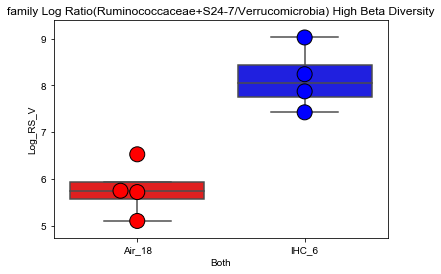

In [67]:
sns.boxplot(x="Both", y="Log_RS_V", 
            palette=['red', 'blue'], data=micro_rawreads_family_high)
sns.swarmplot(x="Both", y="Log_RS_V", s=15, edgecolor='k', linewidth=1,
            palette=['red', 'blue'], data=micro_rawreads_family_high)
plt.title("family Log Ratio(Ruminococcaceae+S24-7/Verrucomicrobia) High Beta Diversity")
ax.set(ylim=(4.5, 9.1))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_logratio_highbeta_family.svg', dpi=300, bbox_inches="tight")

In [71]:
x = list(micro_rawreads_family_high[micro_rawreads_family_high["Both"] == "Air_18"].Log_RS_V.values)
y = list(micro_rawreads_family_high[micro_rawreads_family_high["Both"] == "IHC_6"].Log_RS_V.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=0.0, pvalue=0.015191410988288745)

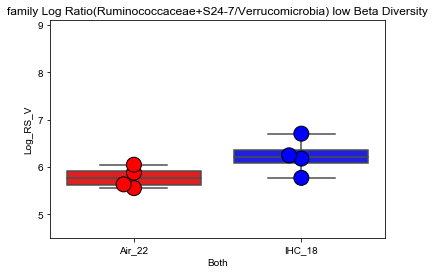

In [69]:
ax = sns.boxplot(x="Both", y="Log_RS_V", 
            palette=['red', 'blue'], data=micro_rawreads_family_low)
ax = sns.swarmplot(x="Both", y="Log_RS_V", s=15, edgecolor='k', linewidth=1,
            palette=['red', 'blue'], data=micro_rawreads_family_low)
plt.title("family Log Ratio(Ruminococcaceae+S24-7/Verrucomicrobia) low Beta Diversity")
ax.set(ylim=(4.5, 9.1))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_logratio_lowbeta_family.svg', dpi=300, bbox_inches="tight")

In [73]:
x = list(micro_rawreads_family_low[micro_rawreads_family_low["Both"] == "Air_22"].Log_RS_V.values)
y = list(micro_rawreads_family_low[micro_rawreads_family_low["Both"] == "IHC_18"].Log_RS_V.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=2.0, pvalue=0.056175598845231926)

## Circadian Metabolome

In [9]:
mmetadata = pd.read_table('../data/CircadianIHC/Metabolome/cIHC_metab_metadata_cleaned.txt', sep='\t', index_col=0)
mmetadata.head()

,cage_number,timepoint,TP,zt,cycle,collection_timestamp,description,diet,experiment_duration,exposure_start,...,host_subject_id,host_taxid,mouse_number,physical_specimen_location,qiita_study_id,scientific_name,sex,taxon_id,title,treatment
sample-id,,,,,,,,,,,,,,,,,,,,,
A32_133_1B,A32,1,one,2.0,night,12/14/17 8:00,4-8 am collection mouse 133,HFD,6 days,10/9/17,...,Mouse 133,10090.0,133.0,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf
A32_133_2B,A32,2,two,6.0,day,12/14/17 12:00,8 am-12 pm collection mouse 133,HFD,6 days,10/9/17,...,Mouse 133,10090.0,133.0,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf
A32_133_3B,A32,3,three,10.0,day,12/14/17 16:00,12 pm-4 pm collection mouse 133,HFD,6 days,10/9/17,...,Mouse 133,10090.0,133.0,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf
A32_133_4B,A32,4,four,14.0,day,12/14/17 20:00,4 pm-8 pm collection mouse 133,HFD,6 days,10/9/17,...,Mouse 133,10090.0,133.0,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf
A32_133_5B,A32,5,five,18.0,night,12/15/17 0:00,8 pm-12 am collection mouse 133,HFD,6 days,10/9/17,...,Mouse 133,10090.0,133.0,LBR freezer,11548.0,mouse gut metagenome,male,410661.0,IHC CR,On shelf


In [8]:
metab_rawreads = pd.read_table('../data/CircadianIHC/Metabolome/cIHC_allunique_noblanks.txt', sep='\t', index_col=0)
metab_rawreads.head()

,"(4R)-4-((3R,5R,6S,7R,9S,10R,12S,13R,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5R,7R,9S,10S,13R,14S,17R)-3,7-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,6R,7R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3R,5S,7S,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,6S,7R,9S,10R,13R,14S,17R)-3,6,7-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(4R)-4-((3S,5R,9S,10S,13R,14S,17R)-3-hydroxy-10,13-dimethyl-12-oxohexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,7R,8R,9S,10R,12S,13R,14S,17R)-3,6,7,12-tetrahydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5R,6R,8S,9S,10R,13R,14S,17R)-3,6-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,7R,8R,9S,10S,12S,13R,14S,17R)-3,7,12-trihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid","(R)-4-((3R,5S,8R,9S,10S,12R,13R,14S,17R)-3,12-dihydroxy-10,13-dimethylhexadecahydro-1H-cyclopenta[a]phenanthren-17-yl)pentanoic acid",...,TOP19 Psoriasis feature - Unknown FeatureID=3668,Tauro-b-muricholic acid,Taurocholic acid,Taurodeoxycholic acid,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid,sphingosin C16 (Artifact)-emf,taurocholic acid,taurodeoxycholic acid
A25_126_3B,5.480050e+06,6.437782e+05,1.858553e+07,4.178921e+06,6.582005e+07,3.532043e+07,1.127328e+07,1.248584e+08,1.305419e+07,1.070126e+08,...,1.503057e+06,1.625237e+08,2.599281e+07,3.455895e+07,3.972509e+06,7.092763e+07,1.242296e+08,3.261237e+07,8.497497e+06,4.548074e+06
A24_125_2B,4.101638e+06,8.403904e+05,1.586084e+07,1.147595e+06,1.624845e+07,6.083623e+07,1.222513e+07,9.934156e+07,7.802231e+06,1.029225e+08,...,2.647022e+07,2.215389e+07,1.749046e+07,5.642961e+05,3.430368e+06,4.361527e+07,7.462060e+07,3.363955e+07,9.049529e+06,3.488563e+05
A24_125_4B,1.291337e+07,1.404490e+06,1.734975e+07,1.633418e+07,1.959786e+07,2.534828e+08,2.640127e+07,1.455391e+08,1.711117e+07,1.137783e+08,...,9.383566e+07,5.251490e+07,3.598053e+07,2.845528e+06,1.160620e+07,1.834564e+08,2.941944e+08,2.888392e+07,1.070718e+07,6.090329e+05
A25_126_2B,1.245210e+07,3.586830e+05,1.292355e+08,4.639285e+06,7.962184e+07,3.874662e+08,2.261776e+07,8.323042e+07,4.515364e+07,7.955346e+07,...,4.715221e+07,8.250941e+08,8.244562e+07,4.387471e+07,4.642114e+06,1.327039e+08,4.359186e+08,2.983001e+07,5.141652e+07,6.407710e+07
A25_126_1B,2.293774e+07,9.960390e+05,4.048562e+07,9.742128e+06,4.051302e+07,7.512250e+08,2.424713e+07,9.144582e+07,7.044006e+07,8.548808e+07,...,4.027034e+07,8.376709e+07,3.017734e+07,8.541908e+06,1.293260e+07,2.635715e+08,4.708396e+08,2.938015e+07,6.813926e+06,1.696077e+07


In [21]:
metab_rawreads_all = pd.merge(mmetadata, metab_rawreads, left_index=True, right_index=True)
metab_rawreads_all.head()

,cage_number,timepoint,TP,zt,cycle,collection_timestamp,description,diet,experiment_duration,exposure_start,...,TOP19 Psoriasis feature - Unknown FeatureID=3668,Tauro-b-muricholic acid,Taurocholic acid,Taurodeoxycholic acid,Ursodeoxycholic acid,a-Muricholic acid,b-Muricholic acid,sphingosin C16 (Artifact)-emf,taurocholic acid,taurodeoxycholic acid
A32_133_1B,A32,1,one,2.0,night,12/14/17 8:00,4-8 am collection mouse 133,HFD,6 days,10/9/17,...,1.661242e+07,6.537102e+07,4.950030e+07,1.693912e+07,2.282491e+07,4.001021e+08,3.443045e+08,2.331718e+07,7.545440e+06,1.457517e+06
A32_133_2B,A32,2,two,6.0,day,12/14/17 12:00,8 am-12 pm collection mouse 133,HFD,6 days,10/9/17,...,2.403266e+07,2.701244e+07,2.473934e+07,5.011941e+06,1.036077e+07,2.153531e+08,1.981380e+08,3.107683e+07,1.390039e+07,1.044636e+06
A32_133_3B,A32,3,three,10.0,day,12/14/17 16:00,12 pm-4 pm collection mouse 133,HFD,6 days,10/9/17,...,7.418942e+06,1.103356e+07,1.576768e+07,2.589485e+06,4.244663e+06,8.789557e+07,7.287584e+07,3.365196e+07,6.033352e+06,5.904093e+04
A32_133_4B,A32,4,four,14.0,day,12/14/17 20:00,4 pm-8 pm collection mouse 133,HFD,6 days,10/9/17,...,3.528513e+07,3.759113e+07,2.807784e+07,2.916894e+06,8.002792e+06,2.294459e+08,2.312409e+08,3.014818e+07,9.345266e+06,2.937876e+05
A32_133_5B,A32,5,five,18.0,night,12/15/17 0:00,8 pm-12 am collection mouse 133,HFD,6 days,10/9/17,...,3.358691e+06,7.148386e+07,3.509714e+07,8.569665e+06,1.320739e+07,3.189389e+08,4.767336e+08,2.278770e+07,1.273956e+07,8.191680e+05


In [22]:
metab_rawreads_all["Both"] = metab_rawreads_all['exposure_type'].astype(str) + "_" + metab_rawreads_all['zt'].astype(str)

In [26]:
bile_acids = [col for col in metab_rawreads_all.columns if 'holic' in col]
bile_acids

['Cholic acid',
 'Deoxycholic acid',
 'Hyodeoxycholic acid',
 'Spectral Match to 12-Ketodeoxycholic acid from NIST14',
 'Spectral Match to Cholic acid from NIST14',
 'Spectral Match to Ursodeoxycholic acid from NIST14',
 'Tauro-b-muricholic acid',
 'Taurocholic acid',
 'Taurodeoxycholic acid',
 'Ursodeoxycholic acid',
 'a-Muricholic acid',
 'b-Muricholic acid',
 'taurocholic acid',
 'taurodeoxycholic acid']

In [27]:
primary_BA = ['Cholic acid', 'Spectral Match to Cholic acid from NIST14', 
              'Tauro-b-muricholic acid', 'Taurocholic acid', 'taurocholic acid']
secondary_BA = ['Deoxycholic acid', 'Hyodeoxycholic acid', 
                'Spectral Match to 12-Ketodeoxycholic acid from NIST14',
                'Spectral Match to Ursodeoxycholic acid from NIST14',
                'Tauro-b-muricholic acid', 'Taurodeoxycholic acid', 'Ursodeoxycholic acid',
                'a-Muricholic acid', 'b-Muricholic acid', 'taurodeoxycholic acid']

In [36]:
cholines = [col for col in metab_rawreads_all.columns if 'choline' in col]
cholines2 = [col for col in metab_rawreads_all.columns if 'PC' in col]
cholines3 = cholines + cholines2
cholines3

['Spectral Match to 1,2-Dilinoleoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(1Z-Hexadecenyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(9Z-Octadecenoyl)-2-tetradecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-(9Z-Octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Heptadecanoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecanoyl-2-octadecadienoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecyl-2-(9Z-octadecenoyl)-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Hexadecyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Myristoyl-2-palmitoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Myristoyl-2-stearoyl-sn-glycero-3-phosphocholine from NIST14',
 'Spectral Match to 1-Myristoyl-sn-glycero-3-phospho

In [37]:
metab_rawreads_all["Log_BA_PPC"] = np.log(metab_rawreads[bile_acids].sum(axis=1)) - np.log(metab_rawreads[cholines3].sum(axis=1))

In [51]:
metab_rawreads_all["Log_BA_origPPC"] = np.log(metab_rawreads[bile_acids].sum(axis=1)) - np.log(metab_rawreads[cholines].sum(axis=1))

In [38]:
metab_rawreads_all["Log_BA1_BA2"] = np.log(metab_rawreads[primary_BA].sum(axis=1)) - np.log(metab_rawreads[secondary_BA].sum(axis=1))

In [ ]:
IHC_ppc = []

In [ ]:
Air_ppc = []

In [ ]:
metab_rawreads_all["Log_IHCppc_AIRppc"] = np.log(metab_rawreads[IHC_ppc].sum(axis=1)) - np.log(metab_rawreads[Air_ppc].sum(axis=1))

In [39]:
high_valuesm = ["Air_10.0", "IHC_2.0"]
low_valuesm = ["Air_2.0", "IHC_22.0"]

In [52]:
metab_rawreads_high  = metab_rawreads_all.loc[metab_rawreads_all['Both'].isin(high_valuesm)]
metab_rawreads_low = metab_rawreads_all.loc[metab_rawreads_all['Both'].isin(low_valuesm)]

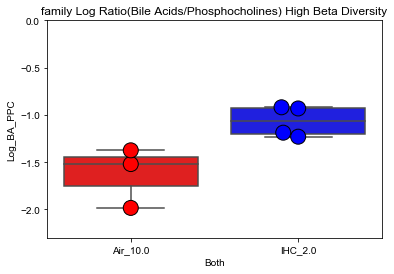

In [44]:
ax = sns.boxplot(x="Both", y="Log_BA_PPC", 
            palette=['red', 'blue'], data=metab_rawreads_high)
ax = sns.swarmplot(x="Both", y="Log_BA_PPC", s=15, edgecolor='k', linewidth=1,
            palette=['red', 'blue'], data=metab_rawreads_high)
plt.title("family Log Ratio(Bile Acids/Phosphocholines) High Beta Diversity")
ax.set(ylim=(-2.3, 0))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_logratio_highbeta_BA_PPC.svg', dpi=300, bbox_inches="tight")

In [48]:
x = list(metab_rawreads_high[metab_rawreads_high["Both"] == "Air_10.0"].Log_BA_PPC.values)
y = list(metab_rawreads_high[metab_rawreads_high["Both"] == "IHC_2.0"].Log_BA_PPC.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=0.0, pvalue=0.02591496360895484)

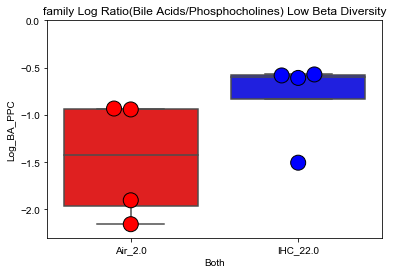

In [45]:
ax = sns.boxplot(x="Both", y="Log_BA_PPC", 
            palette=['red', 'blue'], data=metab_rawreads_low)
ax = sns.swarmplot(x="Both", y="Log_BA_PPC", s=15, edgecolor='k', linewidth=1,
            palette=['red', 'blue'], data=metab_rawreads_low)
plt.title("family Log Ratio(Bile Acids/Phosphocholines) Low Beta Diversity")
ax.set(ylim=(-2.3, 0))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_logratio_lowbeta_BA_PPC.svg', dpi=300, bbox_inches="tight")

In [50]:
x = list(metab_rawreads_low[metab_rawreads_low["Both"] == "Air_2.0"].Log_BA_PPC.values)
y = list(metab_rawreads_low[metab_rawreads_low["Both"] == "IHC_22.0"].Log_BA_PPC.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=2.0, pvalue=0.056175598845231926)

#### Original Phosphocholines

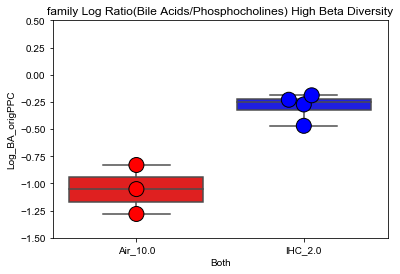

In [62]:
ax = sns.boxplot(x="Both", y="Log_BA_origPPC", 
            palette=['red', 'blue'], data=metab_rawreads_high)
ax = sns.swarmplot(x="Both", y="Log_BA_origPPC", s=15, edgecolor='k', linewidth=1,
            palette=['red', 'blue'], data=metab_rawreads_high)
plt.title("family Log Ratio(Bile Acids/Phosphocholines) High Beta Diversity")
ax.set(ylim=(-1.5, 0.5))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_logratio_highbeta_BA_origPPC.svg', dpi=300, bbox_inches="tight")

In [60]:
x = list(metab_rawreads_high[metab_rawreads_high["Both"] == "Air_10.0"].Log_BA_origPPC.values)
y = list(metab_rawreads_high[metab_rawreads_high["Both"] == "IHC_2.0"].Log_BA_origPPC.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=0.0, pvalue=0.02591496360895484)

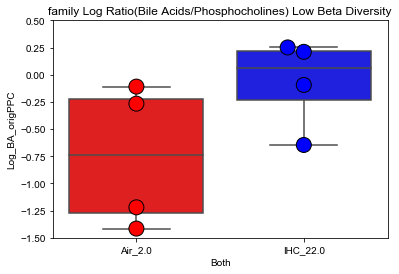

In [63]:
ax = sns.boxplot(x="Both", y="Log_BA_origPPC", 
            palette=['red', 'blue'], data=metab_rawreads_low)
ax = sns.swarmplot(x="Both", y="Log_BA_origPPC", s=15, edgecolor='k', linewidth=1,
            palette=['red', 'blue'], data=metab_rawreads_low)
plt.title("family Log Ratio(Bile Acids/Phosphocholines) Low Beta Diversity")
ax.set(ylim=(-1.5, 0.5))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_logratio_lowbeta_BA_origPPC.svg', dpi=300, bbox_inches="tight")

In [64]:
x = list(metab_rawreads_low[metab_rawreads_low["Both"] == "Air_2.0"].Log_BA_origPPC.values)
y = list(metab_rawreads_low[metab_rawreads_low["Both"] == "IHC_22.0"].Log_BA_origPPC.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=2.0, pvalue=0.056175598845231926)

#### End

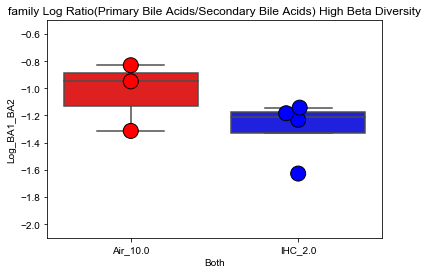

In [58]:
ax = sns.boxplot(x="Both", y="Log_BA1_BA2", 
            palette=['red', 'blue'], data=metab_rawreads_high)
ax = sns.swarmplot(x="Both", y="Log_BA1_BA2", s=15, edgecolor='k', linewidth=1,
            palette=['red', 'blue'], data=metab_rawreads_high)
plt.title("family Log Ratio(Primary Bile Acids/Secondary Bile Acids) High Beta Diversity")
ax.set(ylim=(-2.1, -0.5))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_logratio_highbeta_BA1_BA2.svg', dpi=300, bbox_inches="tight")

In [54]:
x = list(metab_rawreads_high[metab_rawreads_high["Both"] == "Air_10.0"].Log_BA1_BA2.values)
y = list(metab_rawreads_high[metab_rawreads_high["Both"] == "IHC_2.0"].Log_BA1_BA2.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=3.0, pvalue=0.188379558905791)

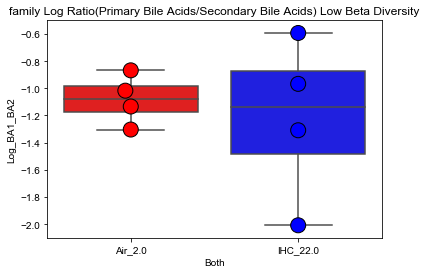

In [57]:
ax = sns.boxplot(x="Both", y="Log_BA1_BA2", 
            palette=['red', 'blue'], data=metab_rawreads_low)
ax = sns.swarmplot(x="Both", y="Log_BA1_BA2", s=15, edgecolor='k', linewidth=1,
            palette=['red', 'blue'], data=metab_rawreads_low)
plt.title("family Log Ratio(Primary Bile Acids/Secondary Bile Acids) Low Beta Diversity")
ax.set(ylim=(-2.1, -0.5))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_logratio_lowbeta_BA1_BA2.svg', dpi=300, bbox_inches="tight")

In [56]:
x = list(metab_rawreads_low[metab_rawreads_low["Both"] == "Air_2.0"].Log_BA1_BA2.values)
y = list(metab_rawreads_low[metab_rawreads_low["Both"] == "IHC_22.0"].Log_BA1_BA2.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=7.0, pvalue=0.44261695723660077)